                                             Домашнє завдання N 6

Для початку давайте імпортуємо потрібні бібліотеки для роботи в цьому завданні:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Для початку давайте завантажимо перший датасет з файлу data_2d:

In [2]:
df_2d = pd.read_csv('data_2d.csv')

df_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


І також те саме зробимо для другого датасету з файлу mnist:

In [3]:
df_mnist = pd.read_csv('mnist.csv')

df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Почнемо роботу спочатку з датасетом df_2d. Як ми бачимо з виводу даного датасету, в нас є 3 стовпці, перший з яких, не несе ніякої корисної інформації, так як в ньому в усіх рядках поміщєні 0. Прибираємо даний стовпець:

In [4]:
df_2d_cleaned = df_2d.iloc[:, 1:]

df_2d_cleaned.head()

,-7.687164597386728637e-01,4.608603078297135447e-01
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400
3,-0.082282,1.137218
4,2.083069,2.694482


Тепер застосуємо elbow method для знаходження оптимальної кількості кластерів:

In [5]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df_2d_cleaned)
    inertias.append(kmeans.inertia_)

Проведемо візуалізацію elbow method:

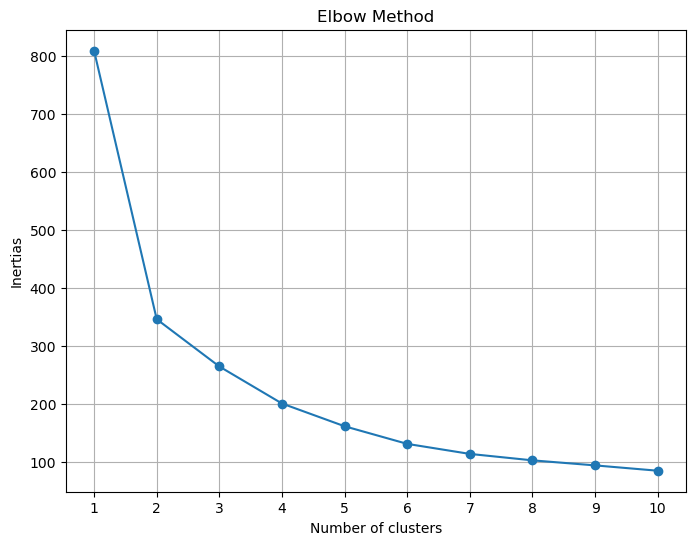

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')  # within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

На графіку методу ліктя видно, що збільшення кількості кластерів веде до зменшення відстані від точок до центру їхнього кластера.
Логічно припускати, що кількість кластерів буде від 2 до 4. Проведемо дослідження.

In [7]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

Візуалізуємо кластеризовані точки:

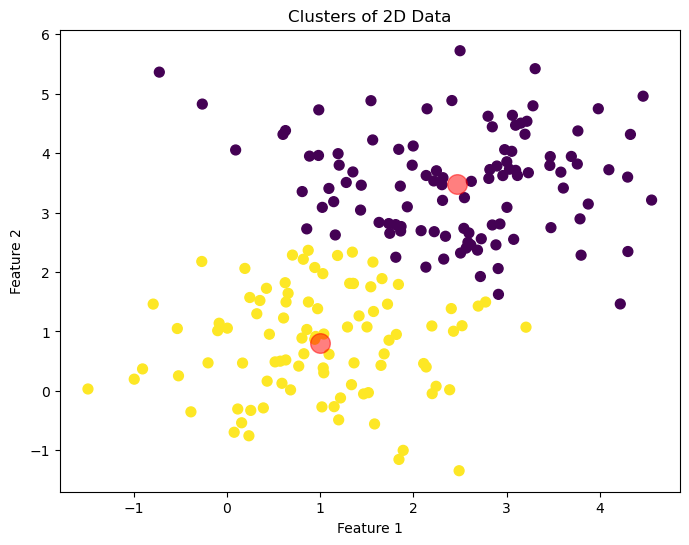

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Clusters of 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Як бачимо, то 2 кластери замало, тому давайте зробимо те саме, але вже з 4 кластерами:

In [9]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

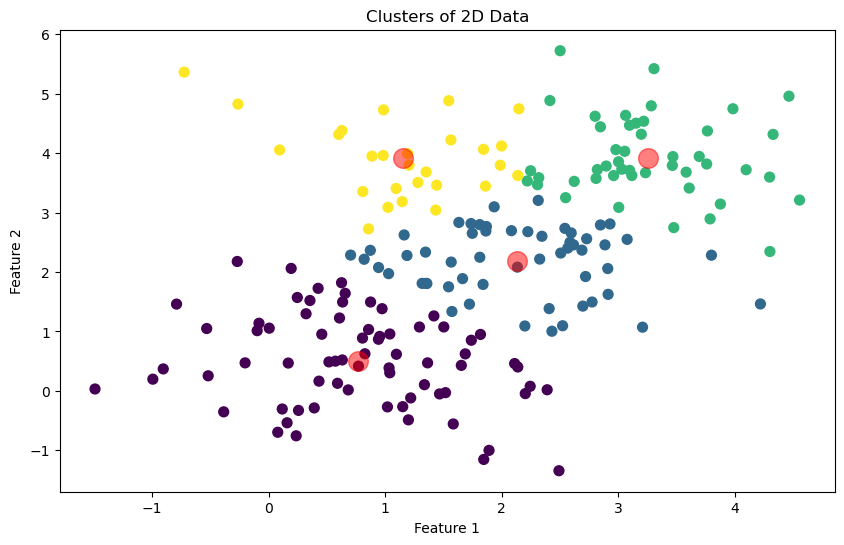

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Clusters of 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Бачимо вже набагато краще розподілення. Тому, мабуть, 4 кластери, це найоптимальніший варіант і показує чітке розділення даних на групи та координати центроїдів

Також спробуємо реалізувати кластеризацію за допомогою "продвинутого" та більш сучасного методу kmeans++ 

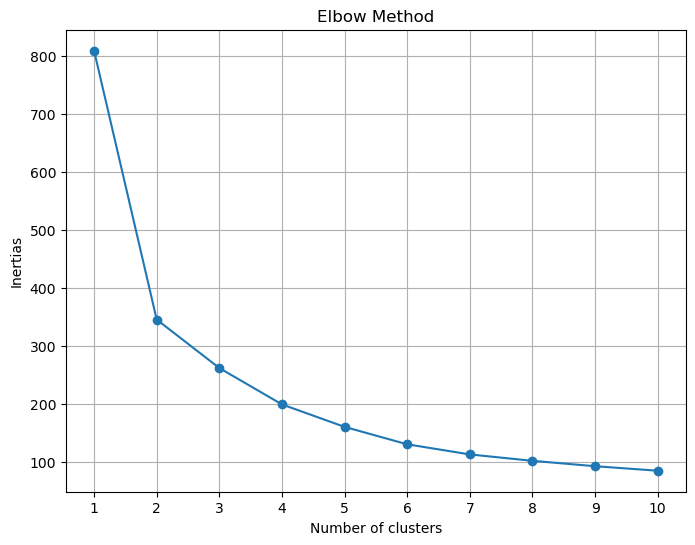

In [11]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_2d_cleaned)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

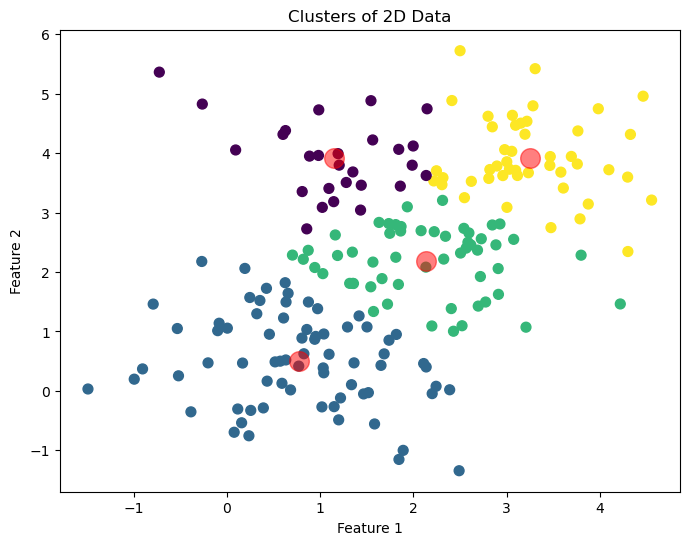

In [12]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

plt.figure(figsize=(8, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Clusters of 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Як ми бачимо з графіків, вцілому обидва методи кластеризують по групах і видають очікуваний результат. Єдине можна побачити, що за допомогою kmeans++ трохи центральніше знаходяться координати центроїдів, що більш точно, як ми бачимо візуально.

Тепер перейдемо до роботи з датасетом mnist.csv. ще раз зчитаємо перші 5 рядків датасету:

In [13]:
df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Як бачимо, в нас дуже дуже великий пласт даних, і нам потрібно скористатись алгоритмом PCA щоб зменшити розмірність наших даних до 2-вимірного варіанту. Це і зробимо: